In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *



/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022/DL3_20241006/ch05
/mnt/batch/tasks/shared/LS_root/mounts/clusters/ml20250203/code/Users/6b022/DL3_20241006


In [2]:
# 0. MNiST 데이터 읽기=============
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [3]:
# 1. 실험용 설정============
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100], 
        output_size=10
    )
    train_loss[key] = []

In [4]:
# 2. 훈련 시작==============
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i%100 == 0:
        print("============" + "iteration" + str(i) + "=============")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))



============iteration0=============
SGD:2.3839109229241
Momentum:2.4533017023229506
AdaGrad:2.166121712849423
Adam:2.2627866458064063
============iteration100=============
SGD:1.521670509111002
Momentum:0.31304818984845173
AdaGrad:0.12069431376218212
Adam:0.2608530669198388
============iteration200=============
SGD:0.7270403486575726
Momentum:0.27853389683061713
AdaGrad:0.13998447449059315
Adam:0.20558860729864095
============iteration300=============
SGD:0.4559620251606543
Momentum:0.1411008256277744
AdaGrad:0.045695982530844496
Adam:0.08677437914649735
============iteration400=============
SGD:0.5173413134126403
Momentum:0.20986627214300357
AdaGrad:0.07114761310389611
Adam:0.11044116629791186
============iteration500=============
SGD:0.4065633826683511
Momentum:0.22082362614364479
AdaGrad:0.13516924637336614
Adam:0.1164969830655726
============iteration600=============
SGD:0.3547033720407341
Momentum:0.10520413076462017
AdaGrad:0.03392470382758391
Adam:0.06430377732282937
===========

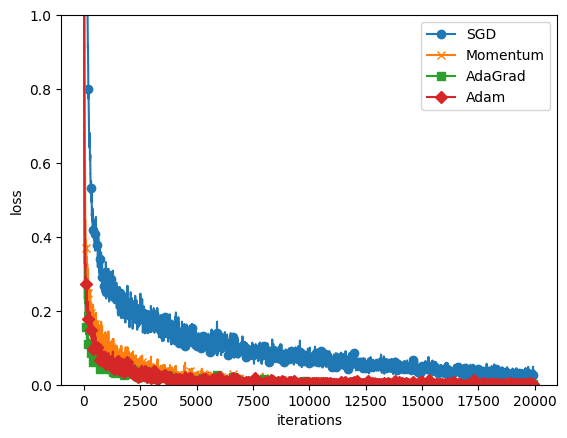

In [5]:
# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()